In [8]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from definitions import SAVED_MODELS_BASE_PATH
from glob import glob
from scipy.stats import f_oneway

In [9]:
def load_f_score(model_id):
    path = glob(f"{SAVED_MODELS_BASE_PATH}/{model_id}/{model_id}_eval_test_*.json")[0]
    dump = json.load(open(path, 'r'))
    records = dump[1:]
    df = pd.DataFrame.from_records(records)
    return df["F-measure_no_offset"].mean()
    

In [10]:
def load_all_scores(model_ids):
    return np.fromiter((load_f_score(id) for id in model_ids), dtype=float)


In [11]:
cqt_model_ids = [
    "cqt_lr_e4_epoch_250",
    "cqt_lr_e4_epoch_250_run2",
    "cqt_lr_e4_epoch_250_run3",
    "cqt_lr_e4_epoch_250_new_run1",
    "cqt_lr_e4_epoch_250_new_run2",
    "cqt_lr_e4_epoch_250_new_run3",
    "cqt_lr_e4_epoch_250_new_run4",
    "cqt_lr_e4_epoch_250_new_run5",
    "cqt_lr_e4_epoch_250_new_run6",
    "cqt_lr_e4_epoch_250_new_run7",
]

swgm_model_ids = [
    "swgm_lr_e4_epoch_250",
    "swgm_lr_e4_epoch_250_run2",
    "swgm_lr_e4_epoch_250_run3",
    "swgm_lr_e4_epoch_250_new_run1",
    "swgm_lr_e4_epoch_250_new_run2",
    "swgm_lr_e4_epoch_250_new_run3",
    "swgm_lr_e4_epoch_250_new_run4",
    "swgm_lr_e4_epoch_250_new_run5",
    "swgm_lr_e4_epoch_250_new_run6",
    "swgm_lr_e4_epoch_250_new_run7",
]

fls_model_ids = [
    "fls_fw11_new",
    "fls_lr_e4_fw11_epoch_250_run2",
    "fls_lr_e4_fw11_epoch_250_run3",
    "fls_lr_e4_epoch_250_new_run1",
    "fls_lr_e4_epoch_250_new_run2",
    "fls_lr_e4_epoch_250_new_run3",
    "fls_lr_e4_epoch_250_new_run4",
    "fls_lr_e4_epoch_250_new_run5",
    "fls_lr_e4_epoch_250_new_run6",
    "fls_lr_e4_epoch_250_new_run7",
]

In [14]:
cqt_scores = load_all_scores(cqt_model_ids)
swgm_scores = load_all_scores(swgm_model_ids)
fls_scores = load_all_scores(fls_model_ids)

all_scores = np.concatenate((cqt_scores[:, np.newaxis], swgm_scores[:, np.newaxis], fls_scores[:, np.newaxis]), axis=1)

In [19]:
print("CQT + SWGM + FLS")
print(f_oneway(cqt_scores, swgm_scores, fls_scores))
print("CQT + SWGM")
print(f_oneway(cqt_scores, swgm_scores))
print("CQT + FLS")
print(f_oneway(cqt_scores, fls_scores))
print("SWGM + FLS")
print(f_oneway(swgm_scores, fls_scores))

CQT + SWGM + FLS
F_onewayResult(statistic=44.60209998173221, pvalue=2.772784887284864e-09)
CQT + SWGM
F_onewayResult(statistic=46.08955971769854, pvalue=2.3339758339367476e-06)
CQT + FLS
F_onewayResult(statistic=63.88866244305314, pvalue=2.4812897859562307e-07)
SWGM + FLS
F_onewayResult(statistic=1.2424904379314479, pvalue=0.2796539447191441)


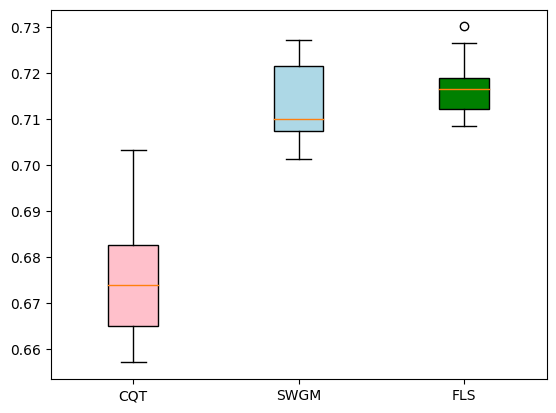

In [20]:
bplot = plt.boxplot(
    all_scores,
    vert=True,
    #meanline=True,
    patch_artist=True,
    labels=["CQT", "SWGM", "FLS"]
)
for patch, color in zip(bplot['boxes'], ['pink', 'lightblue', 'green']):
    patch.set_facecolor(color)